In [36]:
import json

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

with open("data.json") as f:
    data = json.load(f)

HISTORIES = data["histories"]
SCORES = data["scores"]

TOTAL_PARAMS = {
    "(8,)": 1649,
    "(12,)": 2201,
    "(16,)": 2753,
    "(24,)": 3857,
    "(32,)": 4961,
    "(48,)": 7169,
    "(64,)": 9377,
    "(96,)": 13793,
    "(128,)": 18209,
    "(16, 8)": 2881,
    "(32, 16)": 5473,
    "(64, 32)": 11425,
    "(96, 48)": 18401,
    "(128, 64)": 26401,
    "(32, 16, 8)": 5601,
    "(64, 32, 16)": 11937,
    "(128, 64, 32)": 28449,
    "(256, 128, 64)": 76833,
}

mpl.rcParams['figure.dpi'] = 200


In [49]:
def _plot_learning(metric: str):
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(12)

    for models, label, cmap in [
        (
            [
                "(8,)",
                "(12,)",
                "(16,)",
                "(24,)",
                "(32,)",
                "(48,)",
                "(64,)",
                "(96,)",
                "(128,)",
            ],
            "1 layer",
            mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-3, vmax=10), cmap=mpl.cm.Purples),
        ),
        (
            [
                "(16, 8)",
                "(32, 16)",
                "(64, 32)",
                "(96, 48)",
                "(128, 64)",
            ],
            "2 layers",
            mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-8, vmax=8), cmap=mpl.cm.Greens),
        ),
        (
            [
                "(32, 16, 8)",
                "(64, 32, 16)",
                "(128, 64, 32)",
                "(256, 128, 64)",
            ],
            "3 layers",
            mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-3, vmax=3), cmap=mpl.cm.Oranges),
        ),
    ]:
        for i, model in enumerate(models):
            color = cmap.to_rgba(i)
            # Get the mean history of the model over all 5 folds.
            model_metric_histories = np.array([x[metric] for x in HISTORIES[model]])
            mean = np.mean(model_metric_histories, axis=0)
            ax.plot(
                mean, label=model, figure=fig, color=color
            )
            # for x in HISTORIES[model]:
            #     ax.plot(x[metric], label=model, figure=fig, color=color)

    # Set figure title
    ax.set_title(f"Learning curves ({metric})")
    ax.set_xlabel("Epoch")
    ax.set_ylabel(metric)
    ax.legend()

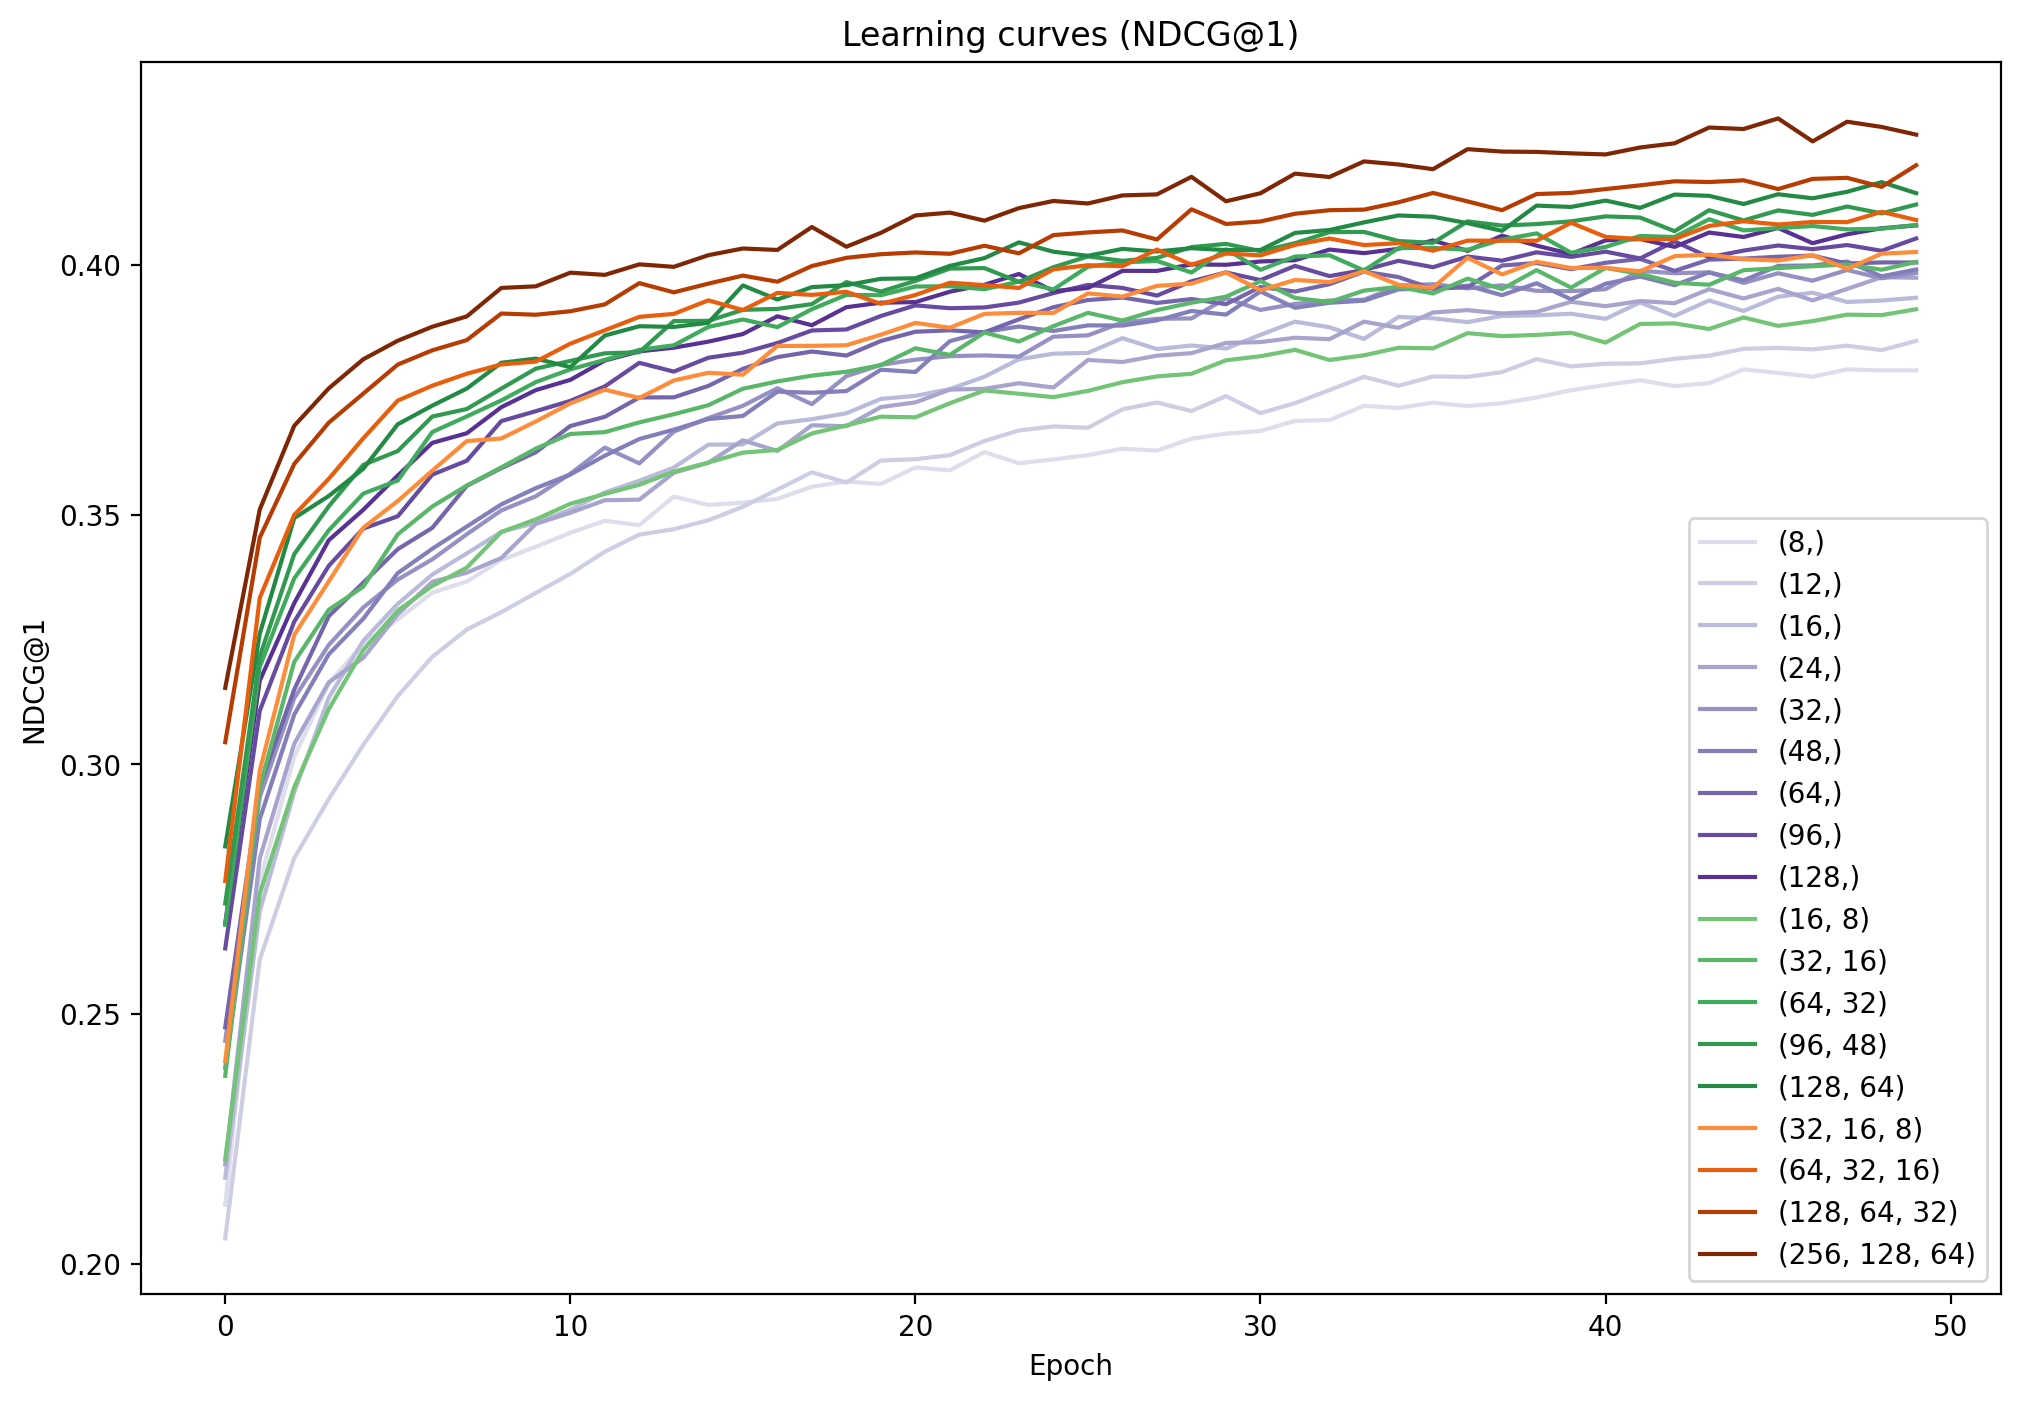

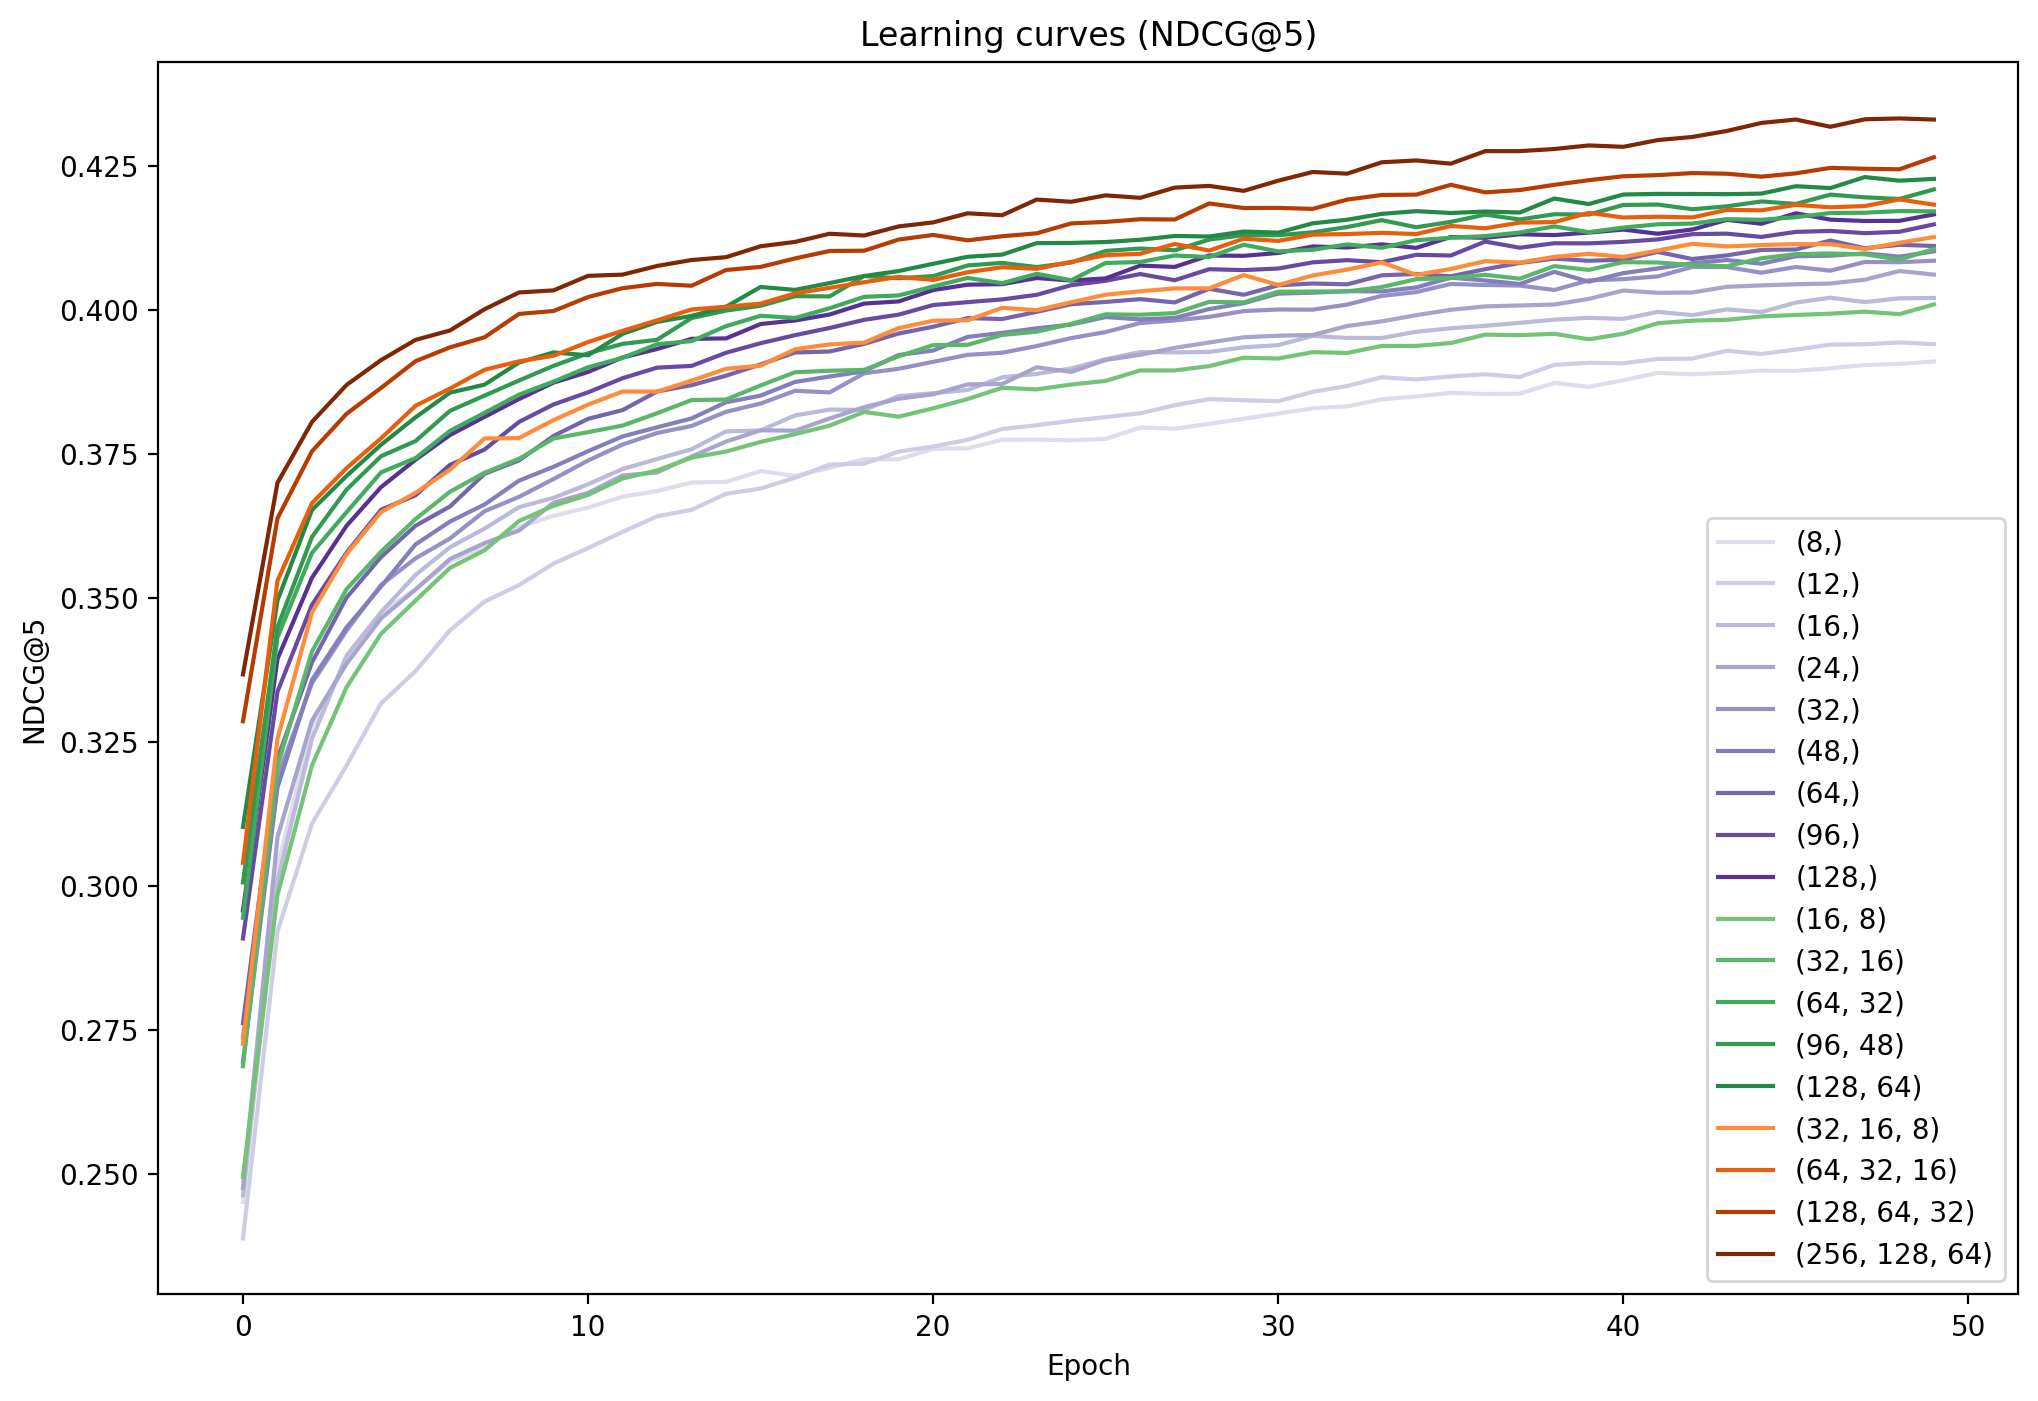

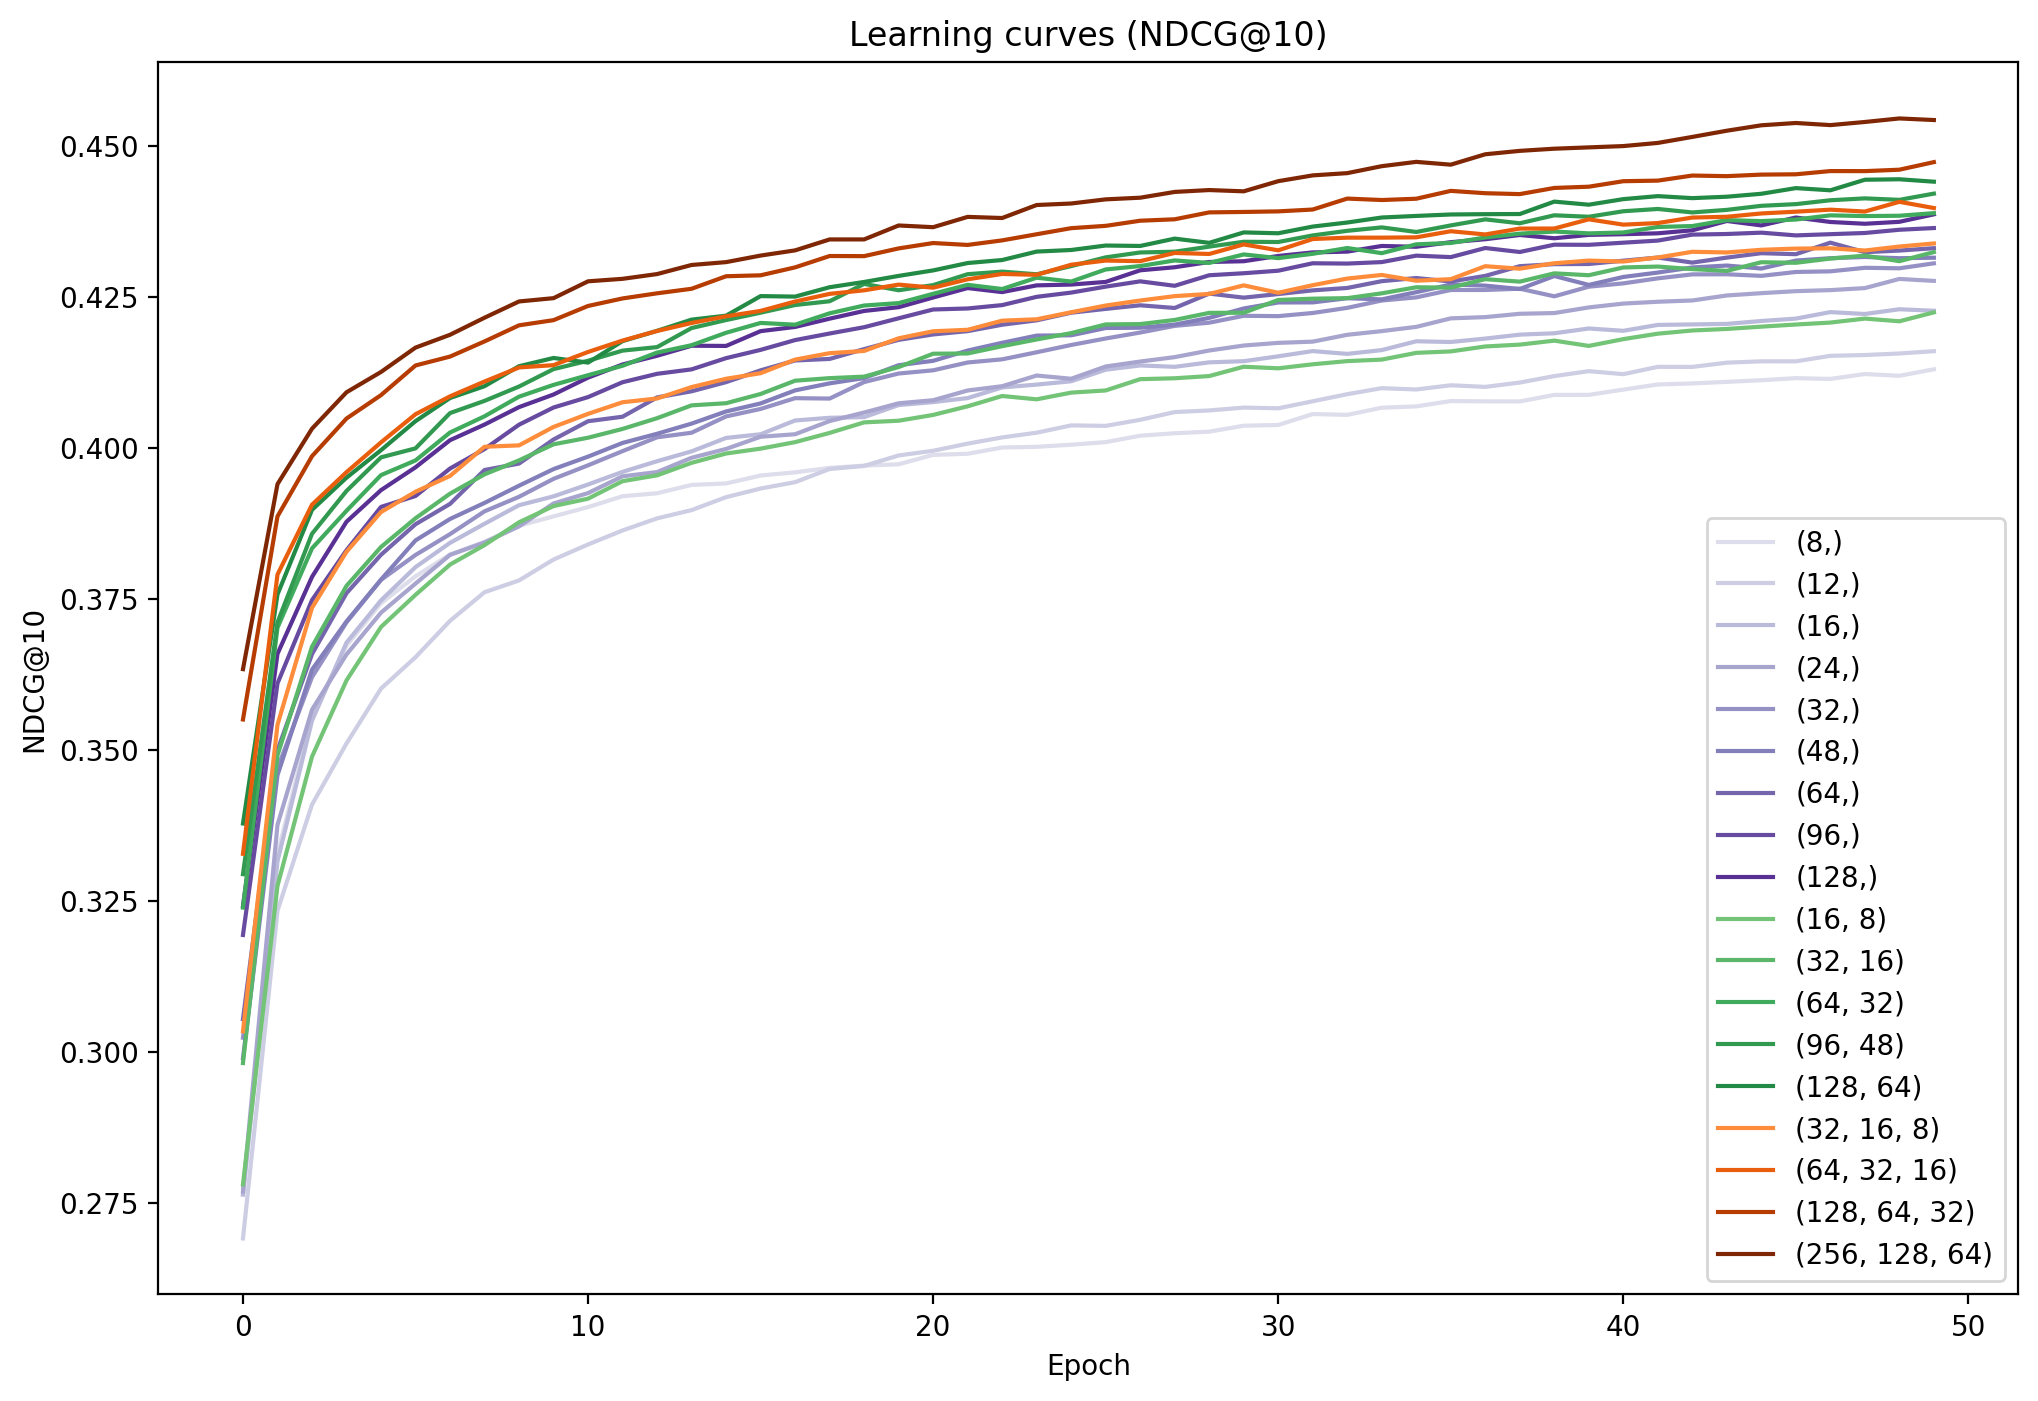

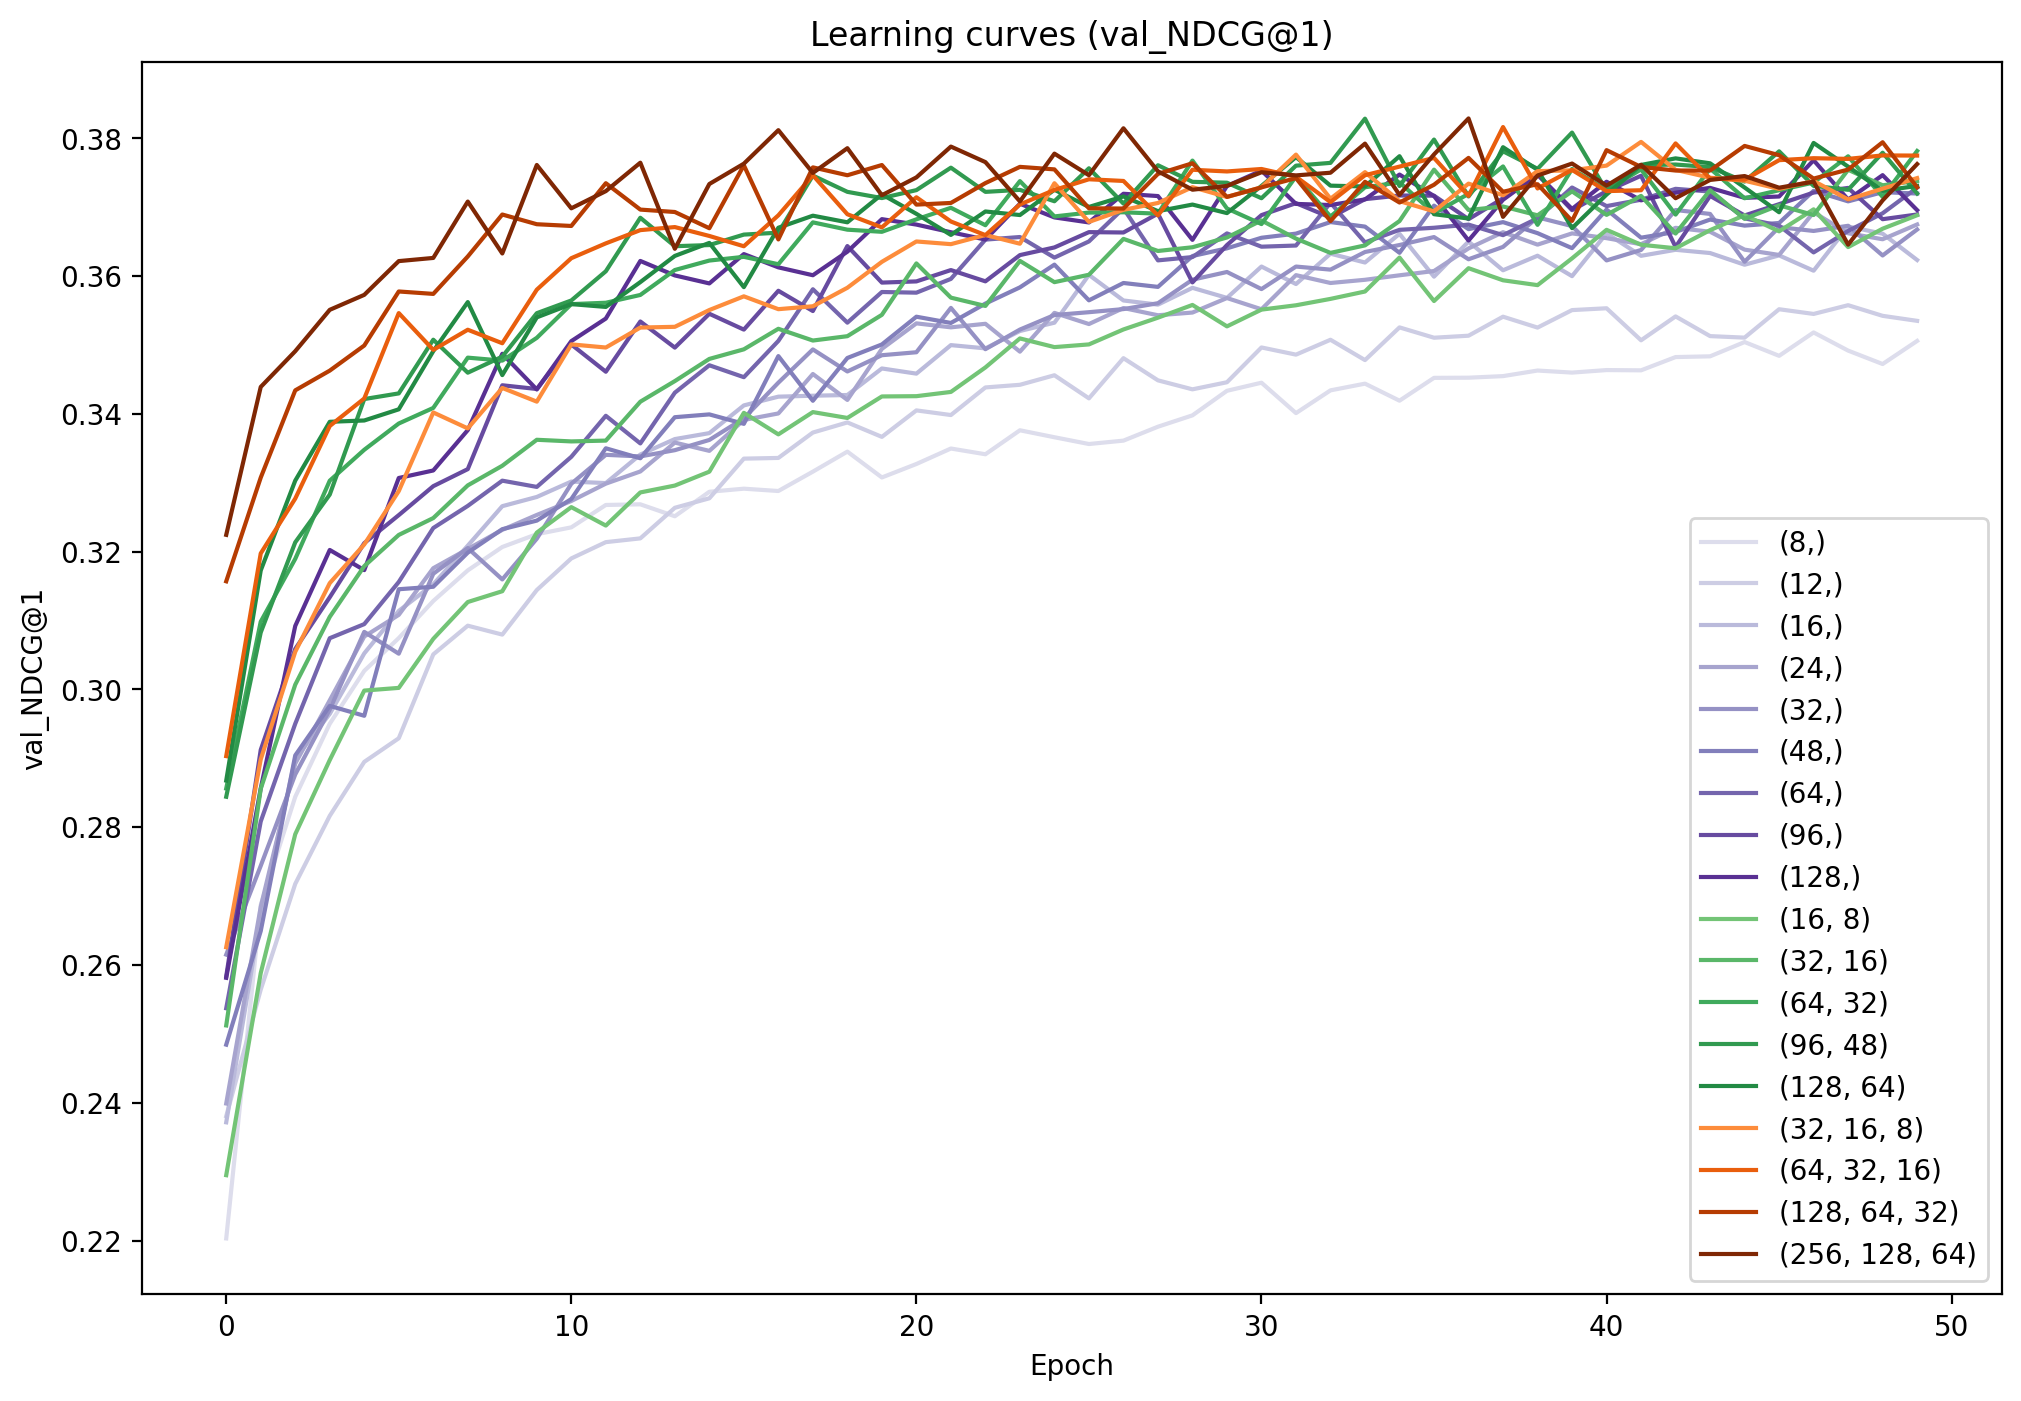

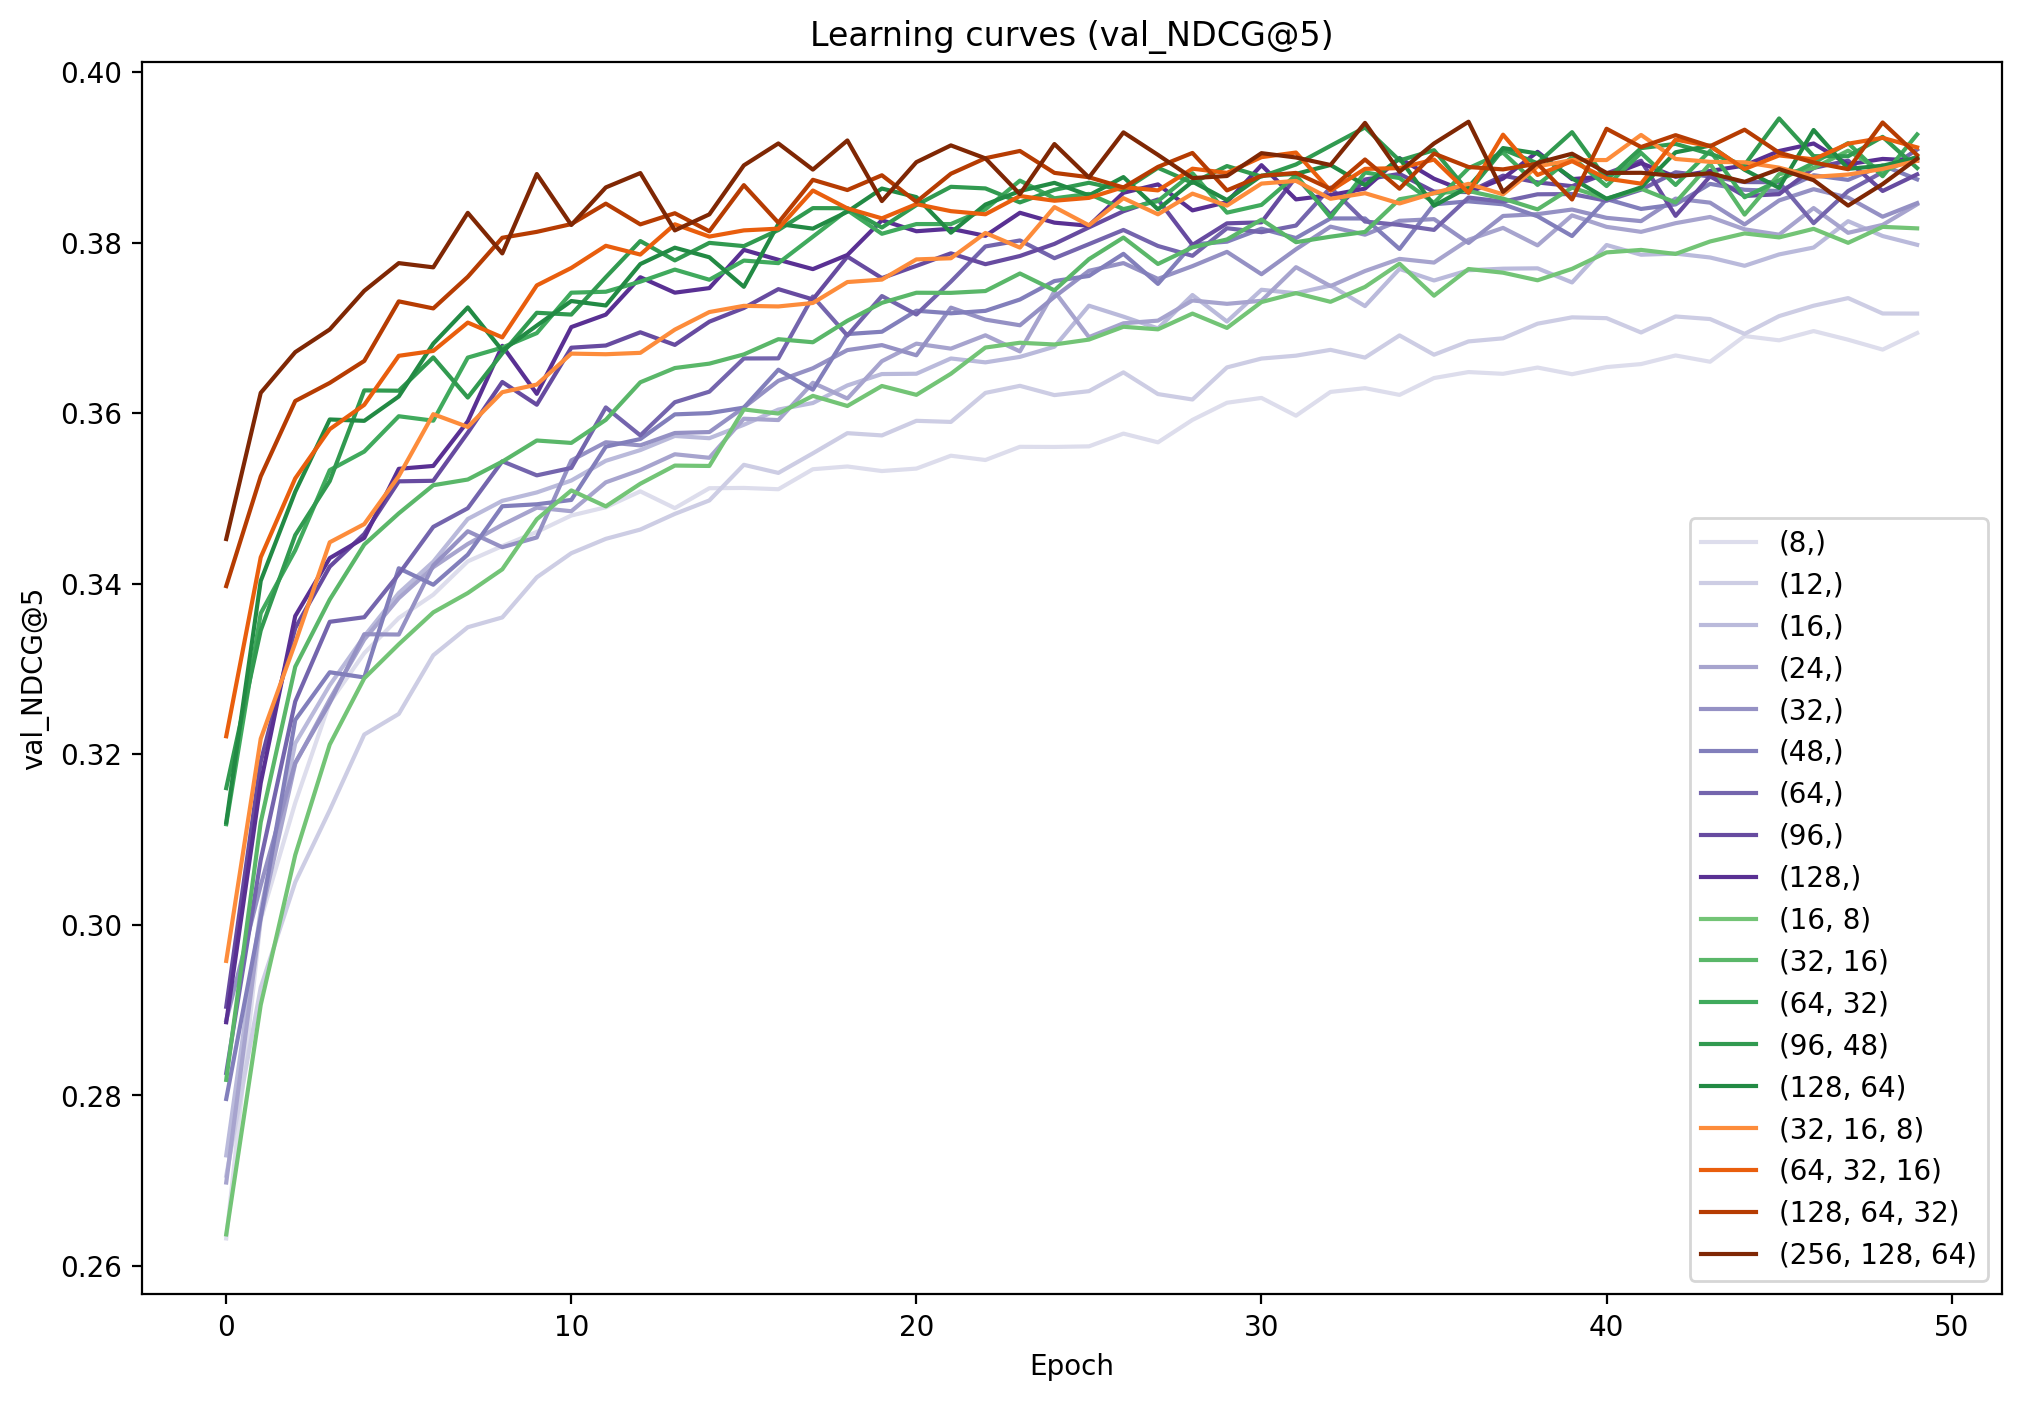

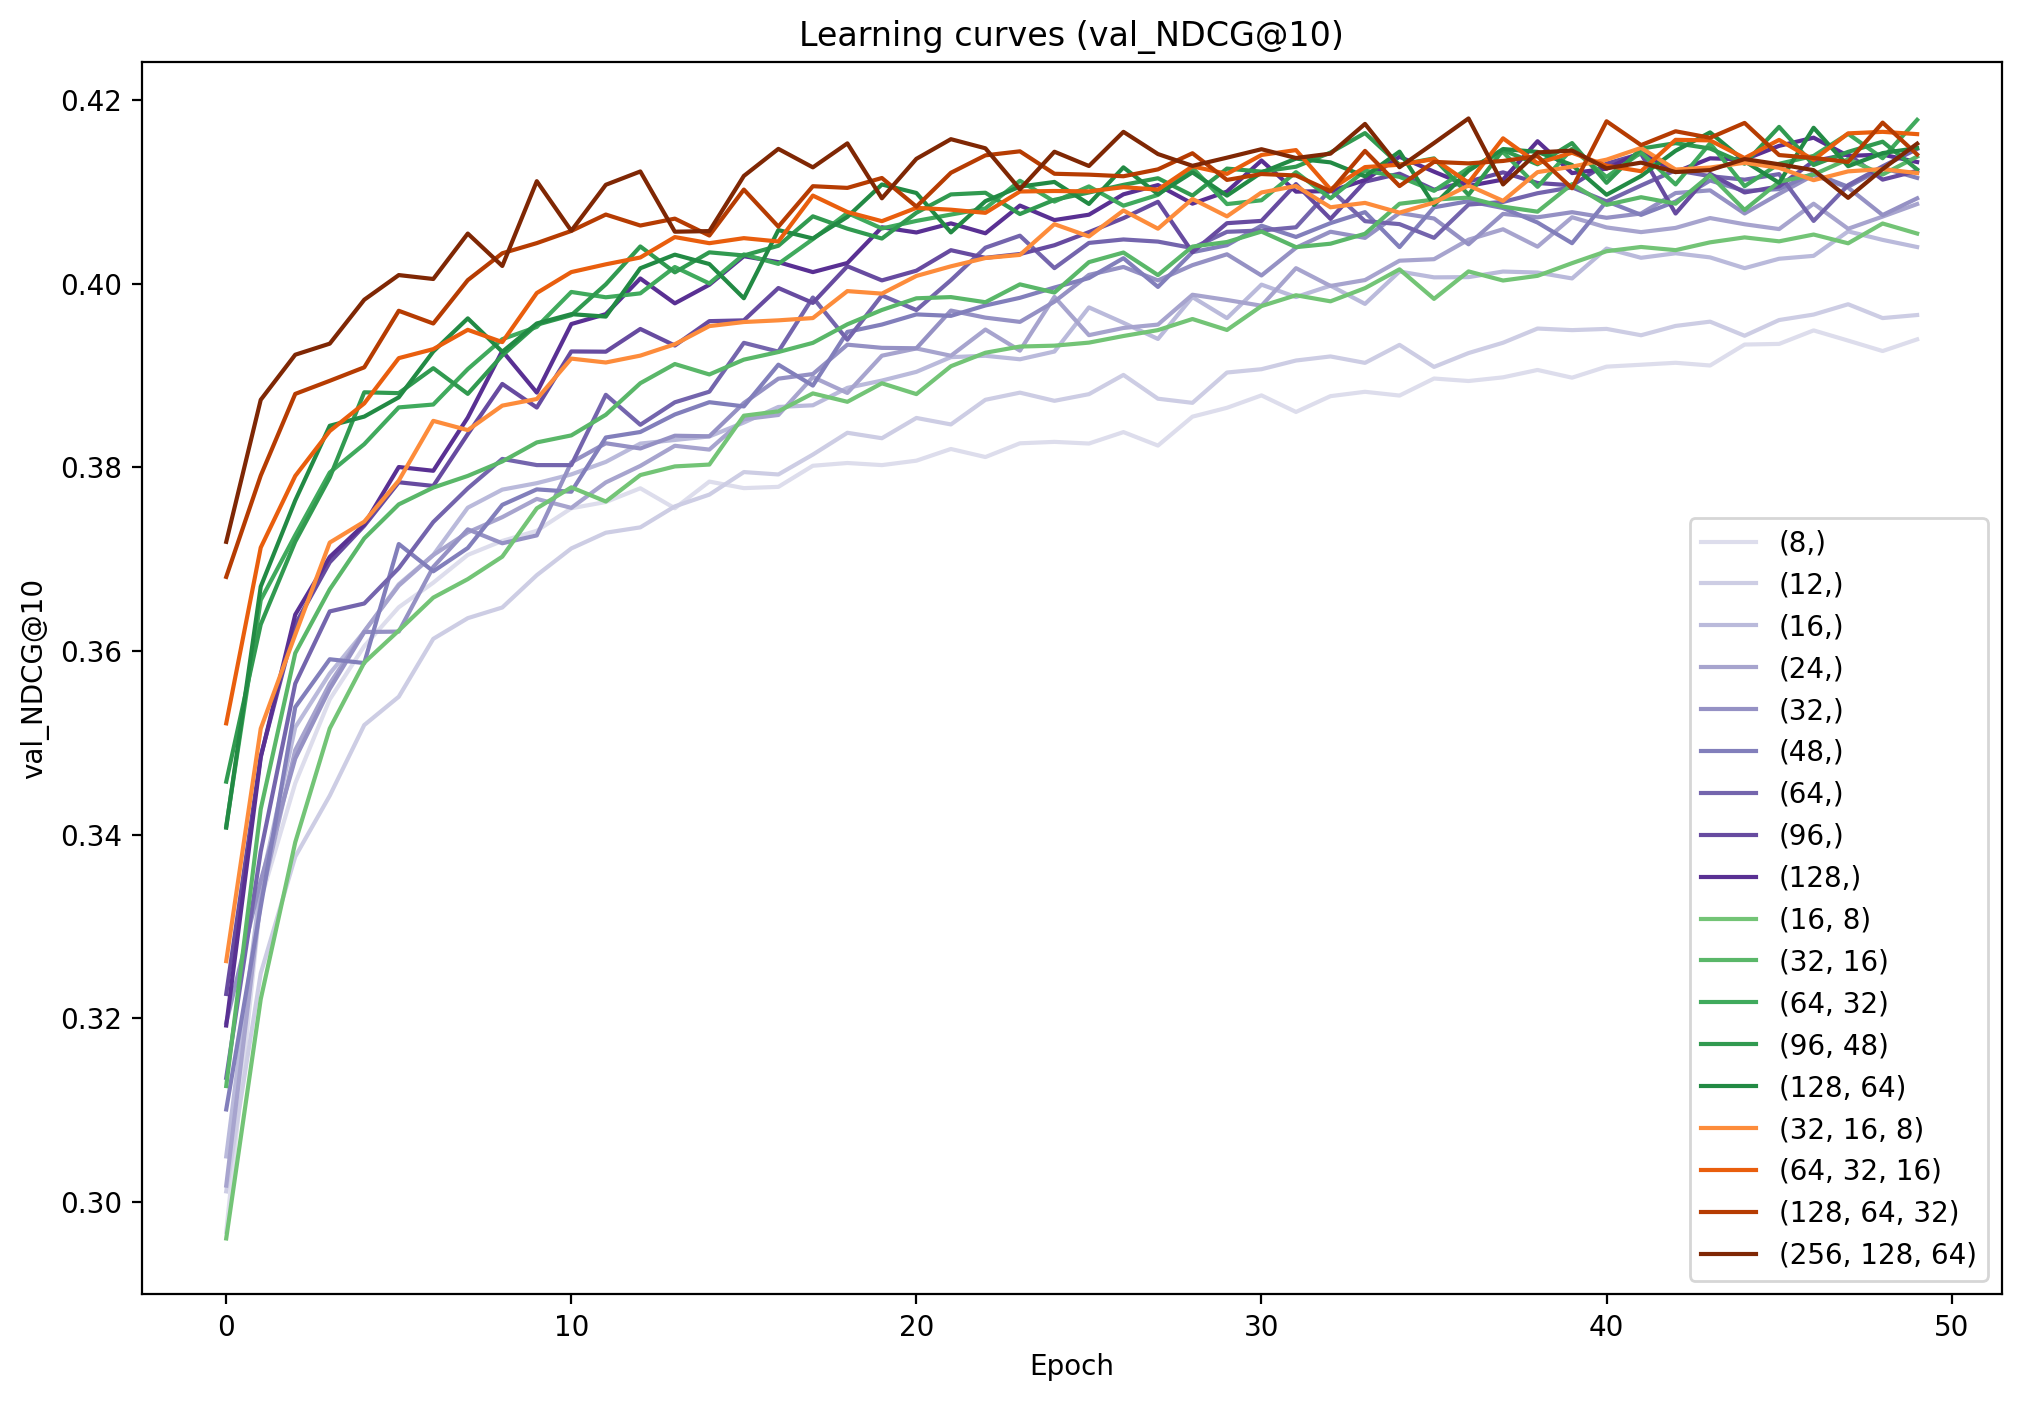

In [50]:
for metric in ["NDCG@1","NDCG@5","NDCG@10","val_NDCG@1","val_NDCG@5","val_NDCG@10"]:
    _plot_learning(metric)
    plt.savefig(f"figs/learning_{metric}.pdf")
    plt.show()